This notebook uses episodic training with raw mutation data and CNV as input data.

This uses AUROC when validating model during training and saving best model. TCGA is seen by model when training. There are 2 domain-specific modules, for cell-line and TCGA.

This is an ablation study where the random classifier component of Epi-FCR is absent.

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from EpiFCModel import ModelEpiFC

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'audrc_threshold': 0.30997513353824613,
 'ldr': 0.5641746556758881,
 'lr': 0.46468936562538143,
 'weight_decay': 0.034194321632385255,
 'momentum': 0.7664161050319672,
 'step_size': 95,
 'loss_weight_epic': 3.187045991420746,
 'loss_weight_epif': 5.244421184062958,
 'ite_train_epi_c': 50,
 'ite_train_epi_f': 70,
 'hd': 4,
 'batch_size': 32,
 'loops_agg_warm': 80,
 'loops_train': 200,
 'loops_warm': 90,
 'warm_up_agg': 1,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelEpiFC('PACLITAXEL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5641746556758881, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5641746556758881, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5641746556758881, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,68,{0: 68},NaN,-0.000000
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.51087,0.812423


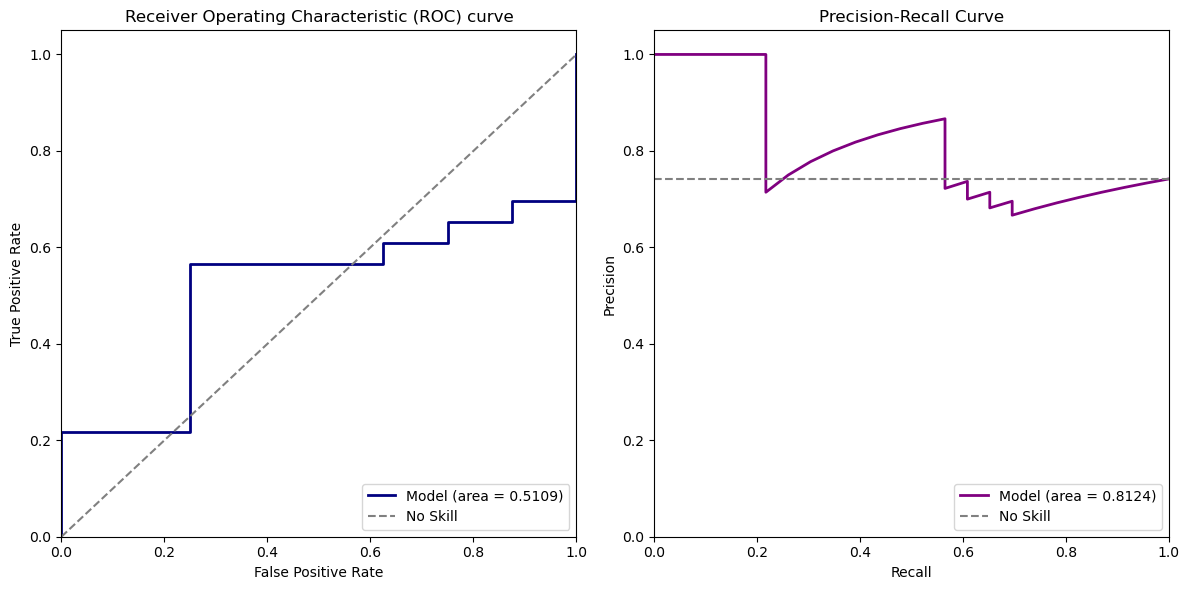

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with PACLITAXEL: 0.30997513353824613


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,608,"{0: 603, 1: 5}",0.413930,0.009681
0,PDX,35,"{0: 30, 1: 5}",0.506667,0.180650
0,TCGA,82,"{1: 53, 0: 29}",0.935589,0.963317


Distribution of Predictions by Model
[0.32285812 0.32507198 0.32563987 0.32619394 0.32659313]
TP: 0, FP: 0, TN: 8, FN: 23


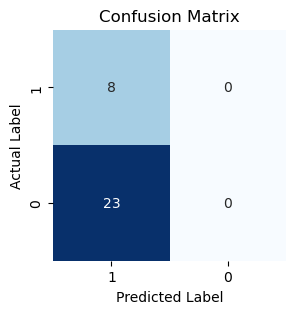

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'audrc_threshold': 0.39449412887272195,
 'ldr': 0.2302331154334271,
 'batch_size': 32,
 'lr': 0.3840085132931605,
 'weight_decay': 0.07680838725224719,
 'momentum': 0.14711593099049555,
 'step_size': 39,
 'loss_weight_epic': 1.1293260980115054,
 'loss_weight_epif': 5.468939819961219,
 'loops_agg_warm': 70,
 'loops_train': 300,
 'loops_warm': 80,
 'warm_up_agg': 0,
 'ite_train_epi_c': 80,
 'ite_train_epi_f': 200,
 'hd': 2,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelEpiFC('CISPLATIN', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2302331154334271, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.2302331154334271, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256,

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,"{0: 50, 1: 4}",0.580000,0.121667
0,TCGA,36,"{1: 27, 0: 9}",0.660494,0.835882


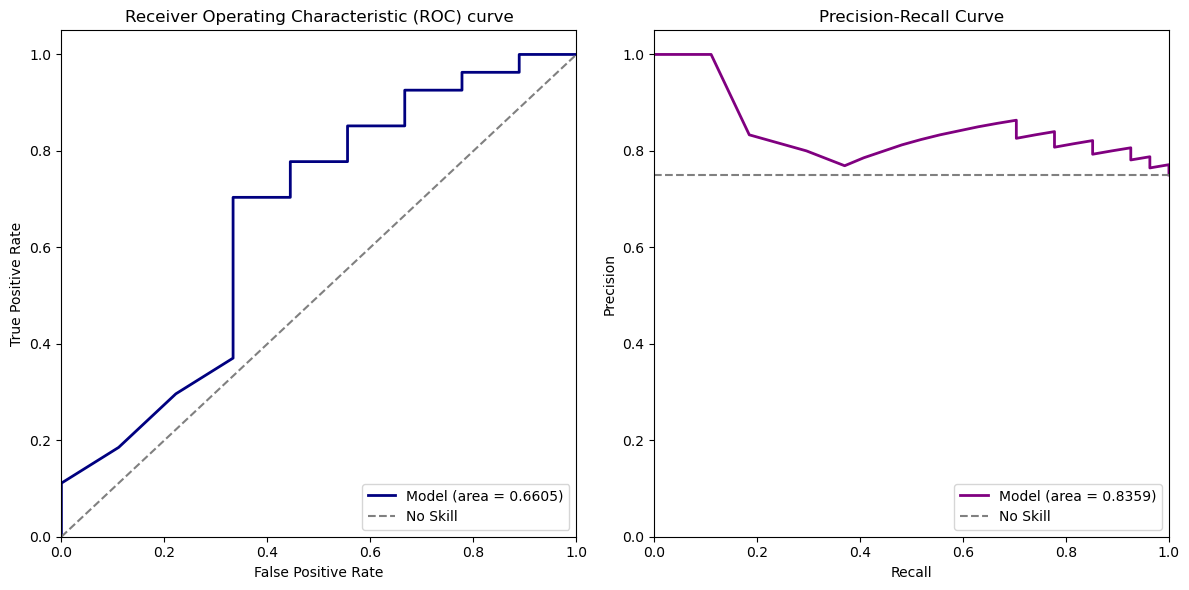

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CISPLATIN: 0.39449412887272195
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,"{0: 473, 1: 10}",0.714059,0.039980
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.351538,0.686167


Distribution of Predictions by Model
[0.99985373 0.99998349 0.99999827 0.99999964 1.        ]
TP: 27, FP: 9, TN: 0, FN: 0


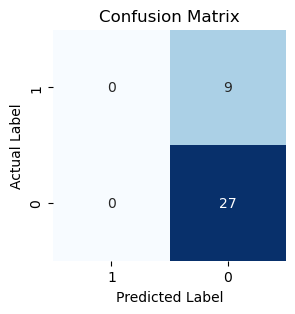

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'audrc_threshold': 0.4236383955925703,
 'ldr': 0.35618856959044937,
 'lr': 0.3013244120404125,
 'weight_decay': 0.027240319543080406,
 'momentum': 0.593923874013126,
 'step_size': 38,
 'loss_weight_epic': 5.386238274164498,
 'loss_weight_epif': 3.414264383725822,
 'loops_agg_warm': 90,
 'loops_warm': 60,
 'warm_up_agg': 0,
 'ite_train_epi_c': 0,
 'ite_train_epi_f': 90,
 'hd': 3,
 'batch_size': 64,
 'loops_train': 600,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelEpiFC('5-FLUOROURACIL', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.35618856959044937, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.35618856959044937, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.35618856959044937, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,61,{0: 61},NaN,-0.000000
0,TCGA,21,"{1: 17, 0: 4}",0.838235,0.965782


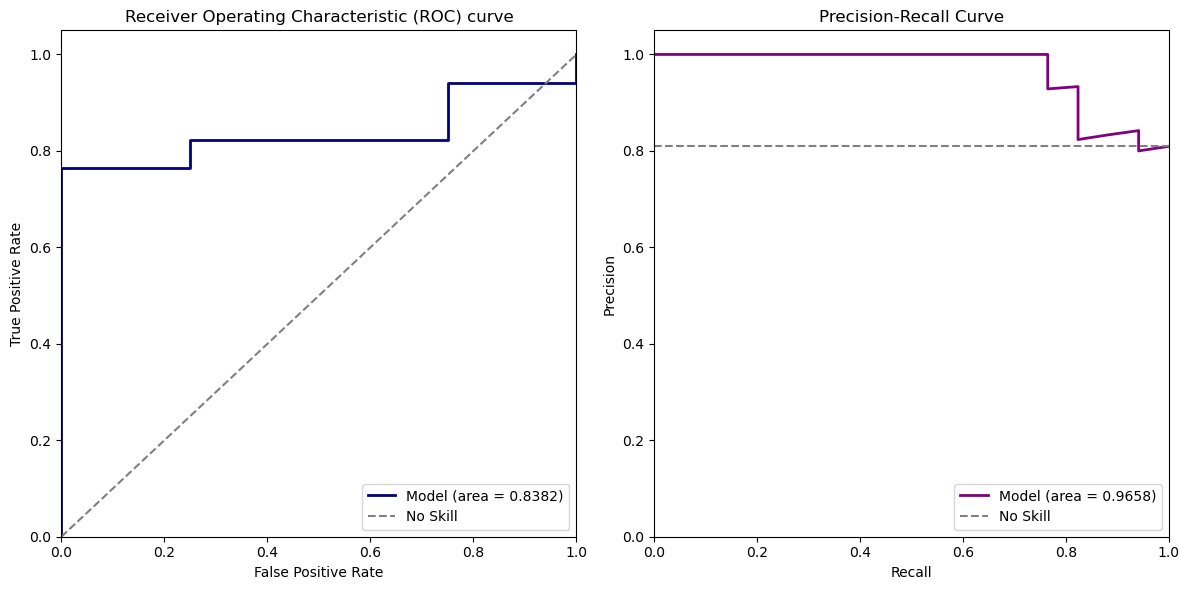

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with 5-FLUOROURACIL: 0.4236383955925703
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,528,"{0: 526, 1: 2}",0.146388,0.003238
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.853649,0.874856


Distribution of Predictions by Model
[0.01776216 0.02378628 0.02680643 0.03572052 0.04389657]
TP: 0, FP: 0, TN: 4, FN: 17


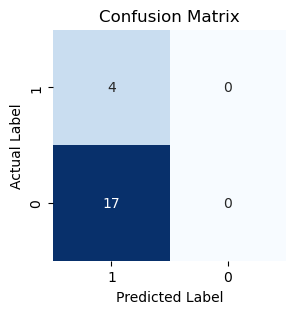

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'audrc_threshold': 0.2835942198894918,
 'ldr': 0.21883102145045996,
 'lr': 0.34145048535428946,
 'weight_decay': 0.06680433155037463,
 'momentum': 0.40814928613603113,
 'step_size': 73,
 'loss_weight_epic': 6.696937263943255,
 'loss_weight_epif': 1.8418088788166642,
 'loops_agg_warm': 90,
 'loops_warm': 50,
 'warm_up_agg': 0,
 'ite_train_epi_c': 90,
 'ite_train_epi_f': 80,
 'hd': 3,
 'batch_size': 32,
 'loops_train': 300,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelEpiFC('CYCLOPHOSPHAMIDE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.21883102145045996, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.21883102145045996, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.21883102145045996, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,66,{0: 66},NaN,-0.000000
0,TCGA,19,"{1: 17, 0: 2}",0.794118,0.972045


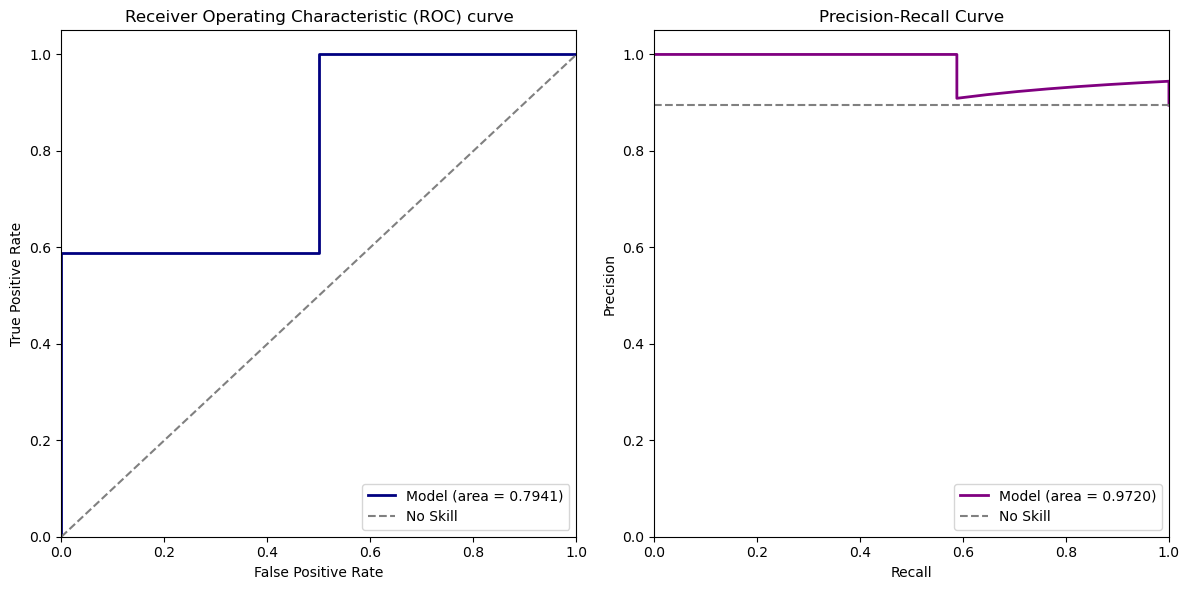

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CYCLOPHOSPHAMIDE: 0.2835942198894918
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,579,"{0: 567, 1: 12}",0.651969,0.033103
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.595745,0.931826


Distribution of Predictions by Model
[0.54997879 0.55461127 0.55605662 0.55989158 0.56598204]
TP: 17, FP: 2, TN: 0, FN: 0


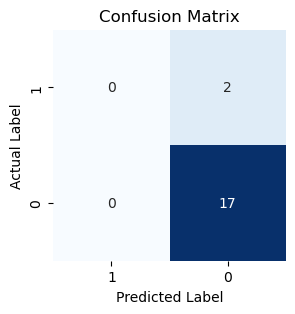

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'audrc_threshold': 0.35,
 'ldr': 0.14882850522413524,
 'lr': 0.4756769710692417,
 'weight_decay': 0.04922407526193496,
 'momentum': 0.3900291467252101,
 'step_size': 17,
 'loss_weight_epic': 3.655604201894829,
 'loss_weight_epif': 5.379496718320383,
 'loops_agg_warm': 60,
 'loops_train': 400,
 'loops_warm': 100,
 'warm_up_agg': 0,
 'ite_train_epi_c': 0,
 'ite_train_epi_f': 250,
 'hd': 2,
 'batch_size': 64,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelEpiFC('GEMCITABINE', 'mut_cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.14882850522413524, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=648, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.14882850522413524, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=25

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,{0: 54},NaN,-0.000000
0,TCGA,18,"{0: 9, 1: 9}",0.567901,0.682222


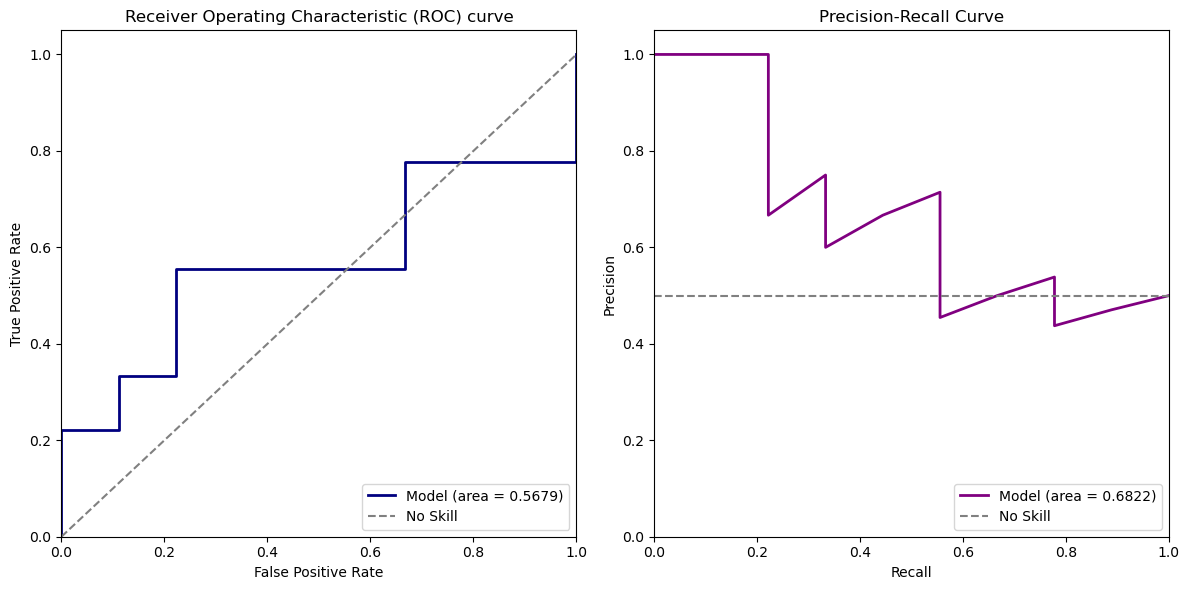

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with GEMCITABINE: 0.35
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,{0: 483},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.509804,0.666213


Distribution of Predictions by Model
[0.42754042 0.47700734 0.50628179 0.60584593 0.88551825]
TP: 5, FP: 6, TN: 3, FN: 4


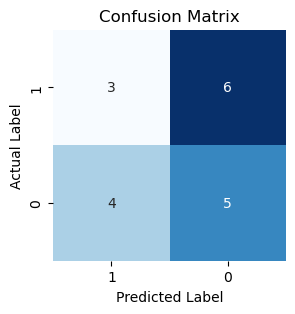

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)